# Светлинская ГЭС-3, генератор ГГ-2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Вводные данные для анализа
Pnom=107                                                    # Номинальная мощность генераторов, МВт
column_prefix = "G2"                                        # Выбираем номер генератора для тестов
station_codename='Svet'                                     # Кодовое имя станции

k_scale=1                                                   # Коэффициент масштабирования графиков и рисунков
pic_shift=20
plt.rcParams['figure.figsize'] = [24.5*k_scale, 7*k_scale]    # Задание соотношения сторон

In [3]:
# Импорт и форматирование csv с основными данными
skiprows=1050      # Пропускаем строки в df_origin
df_origin_data = pd.read_csv(station_codename+'_main_data.csv', sep=';', encoding="ansi", decimal=',', skiprows=skiprows)
df_origin_data.columns = ["TimeUTC", 
                 "G1_Fa", "G1_U1", "G1_P", "G1_Q", "G1_If","G1_Uf",
                 "G2_Fa", "G2_U1", "G2_P", "G2_Q", "G2_If","G2_Uf",
                 "G3_Fa", "G3_U1", "G3_P", "G3_Q", "G3_If","G3_Uf"]
# Преобразовываем столбец с датами в datetime
df_origin_data['TimeUTC'] = pd.to_datetime(df_origin_data['TimeUTC'], dayfirst=True)
# Создаем маску для фильтрации строк, где миллисекунды равны нулю
mask = df_origin_data['TimeUTC'].dt.microsecond == 0
# Применяем маску к DataFrame, чтобы отфильтровать нужные строки
df_origin_data = df_origin_data[mask]
# Импорт и форматирование csv Поиска СК
df_sk_results = pd.read_csv(station_codename+'_results_data.csv', sep=';', encoding="ansi", decimal=',')
df_sk_results.columns = ["TimeUTC", 
                 "G1_def", "G1_def_P", "G1_def_Q", "G1_def_P_amp", "G1_def_P_freq","G1_def_Q_amp", "G1_def_Q_freq",
                 "G2_def", "G2_def_P", "G2_def_Q", "G2_def_P_amp", "G2_def_P_freq","G2_def_Q_amp", "G2_def_Q_freq",
                 "G3_def", "G3_def_P", "G3_def_Q", "G3_def_P_amp", "G3_def_P_freq","G3_def_Q_amp", "G3_def_Q_freq"]
df_sk_results["time"] = ((pd.to_datetime(df_sk_results["TimeUTC"], dayfirst=True).astype('int64') / 1e6 - float(pd.to_datetime(df_sk_results["TimeUTC"][0], dayfirst=True).to_datetime64()) / 1e6).astype('int64')) / 1e3
# Преобразовываем столбец с датами в datetime
df_sk_results['TimeUTC'] = pd.to_datetime(df_sk_results['TimeUTC'], dayfirst=True)
# Создаем маску для фильтрации строк, где миллисекунды равны нулю
mask = df_sk_results['TimeUTC'].dt.microsecond == 0
# Применяем маску к DataFrame, чтобы отфильтровать нужные строки
df_sk_results = df_sk_results[mask]
# Импорт и форматирование csv СМСР
df_ext_SMSR = pd.read_csv('./'+column_prefix+'/SMSR_SIG_EXT_'+station_codename+'_'+column_prefix+'_data.csv', sep=';', encoding="windows-1251")
# Создаем таблицу diagno с выводом ошибок алгоритма СМСР (берем часть колонок из df_ext)
df_ext_SMSR_diagno = df_ext_SMSR[["osh_ARV1_ext[6]", "osh_ARV1_ext[7]", "osh_ARV1_ext[8]", "osh_ARV1_ext[9]", "osh_ARV1_ext[10]"]]
df_ext_SMSR_diagno.columns = ["bug1", "bug2", "bug3", "bug4", "bug5"]
# Создаем таблицу result_osc для вывода расчетов типов данных алгоритма СМСР (берем часть колонок из df_ext)
df_ext_SMSR_results = df_ext_SMSR[["osh_ARV1_ext[{:d}]".format(i) for i in range(11, 25)]]
df_ext_SMSR_results.columns = ["osc1_f", "osc1_phi", "osc1_np", "osc2_f", "osc2_phi", "osc2_np", "osc3_f", "osc3_phi", "osc3_np", "osc4_f", "osc4_phi", "osc4_np", "osc5_f", "osc5_amp"]
# Создаем таблицу osh для вывода выходных сигналов алгоритма СМСР (берем часть колонок из df_ext)
df_ext_SMSR_osh = df_ext_SMSR[["osh_ARV1_ext[1]", "osh_ARV1_ext[2]", "osh_ARV1_ext[3]", "osh_ARV1_ext[4]", "osh_ARV1_ext[5]"]]
df_ext_SMSR_osh.columns = ["osc1", "osc2", "osc3", "osc4", "osc5"]

## Исходные сигналы

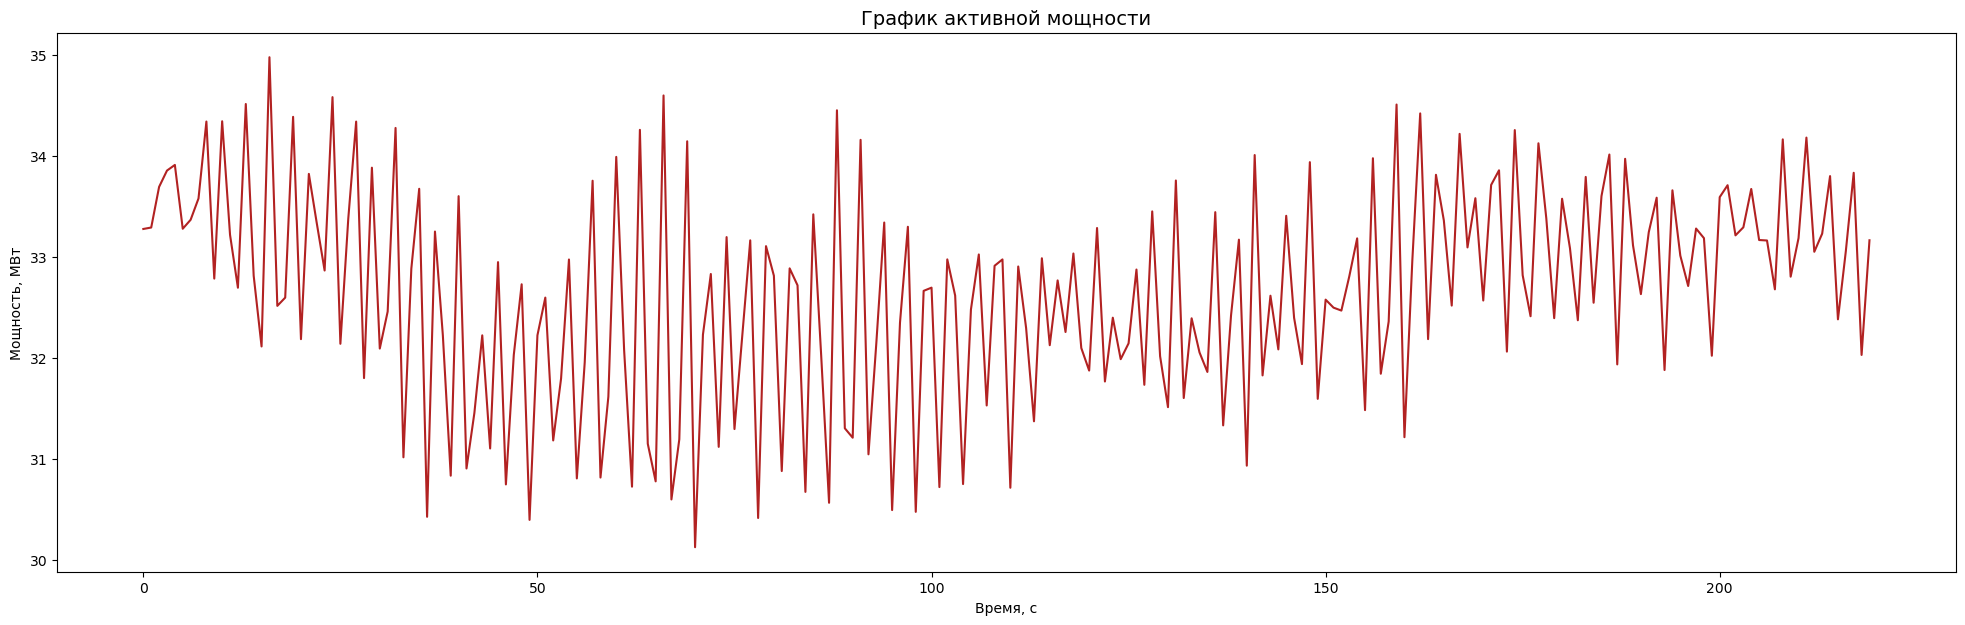

In [4]:
# Активная мощность
plt.title('График активной мощности', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Мощность, МВт')
x=df_sk_results['time']
y=df_origin_data[column_prefix + "_P"]/1000000
plt.plot(x,y,'firebrick', label='Активная мощность')
plt.show()

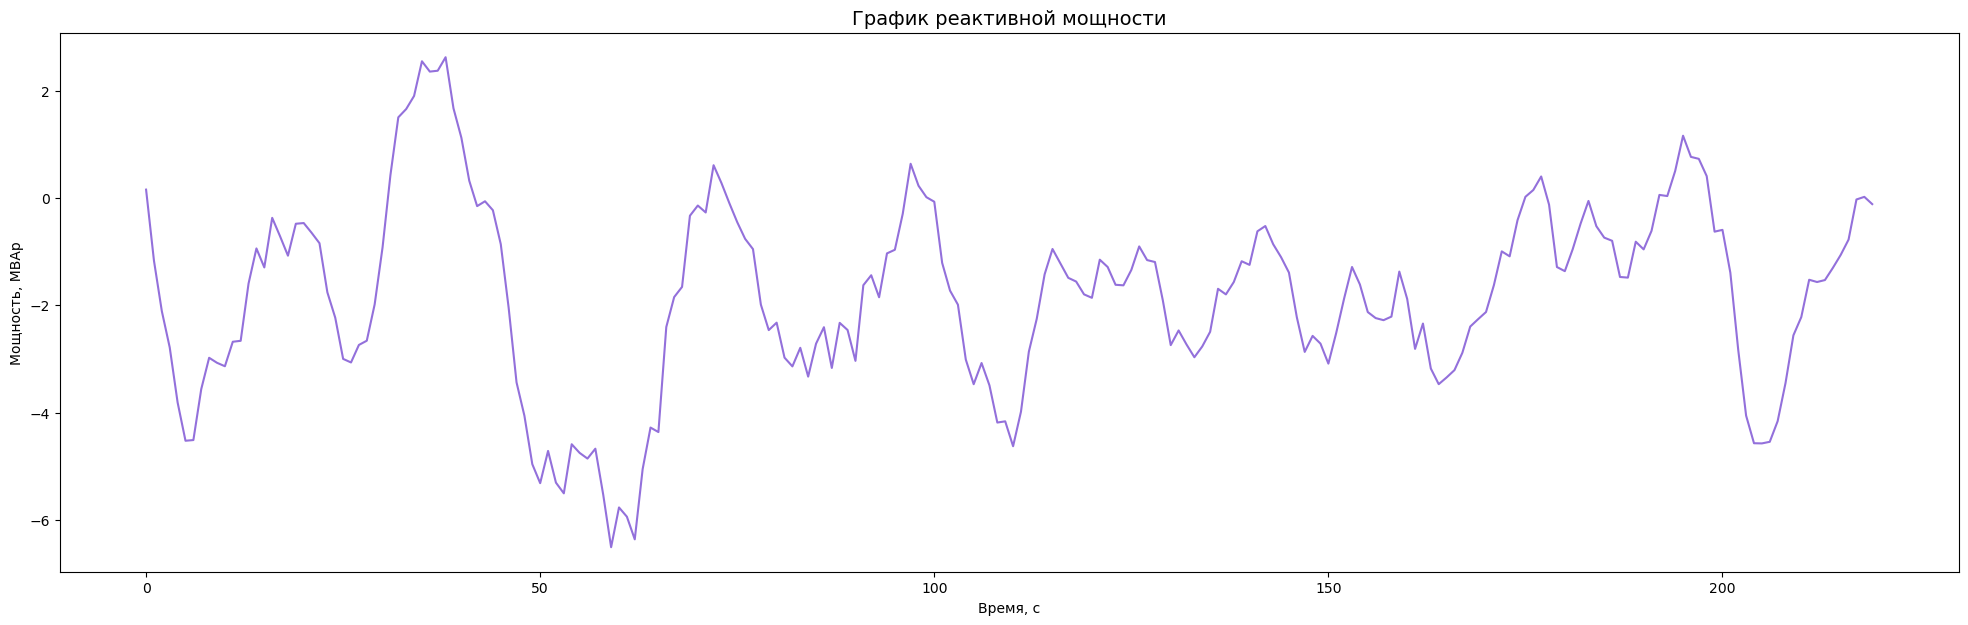

In [5]:
# Реактивная мощность
plt.title('График реактивной мощности', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Мощность, МВАр')
x=df_sk_results['time']
y=df_origin_data[column_prefix+"_Q"]/1000000
plt.plot(x,y,'mediumpurple', label='Реактивная мощность')
plt.show()

## Анализ результатов СМСР

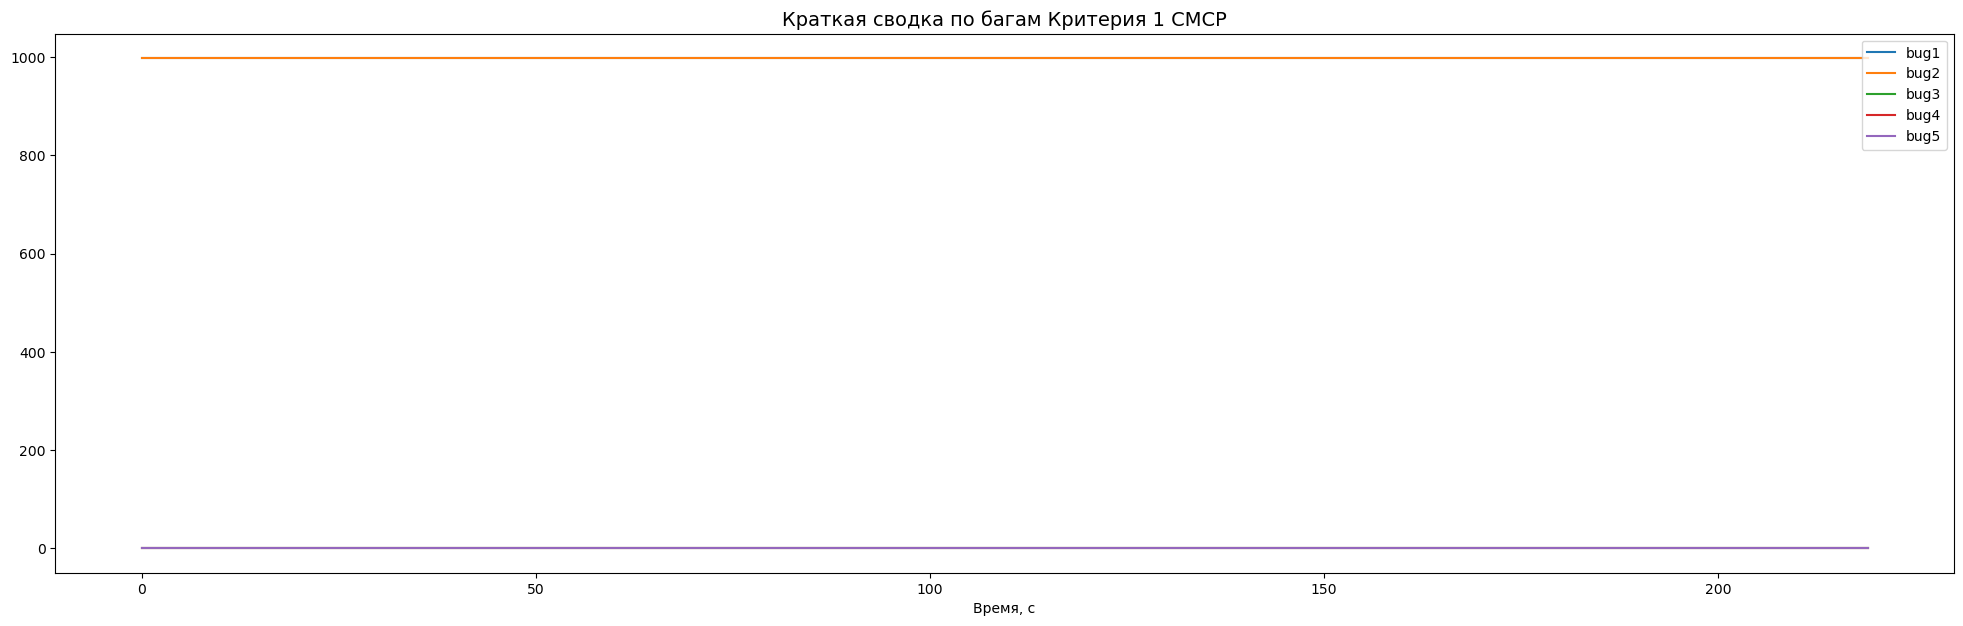

In [6]:
# Краткая сводка по багам Критерия 1
plt.title('Краткая сводка по багам Критерия 1 СМСР', fontsize=14)
plt.xlabel('Время, с')
plt.plot(df_ext_SMSR_diagno["bug1"], label='bug1')
plt.plot(df_ext_SMSR_diagno["bug2"], label='bug2')
plt.plot(df_ext_SMSR_diagno["bug3"], label='bug3')
plt.plot(df_ext_SMSR_diagno["bug4"], label='bug4')
plt.plot(df_ext_SMSR_diagno["bug5"], label='bug5')
plt.legend(loc='upper right')
plt.show()

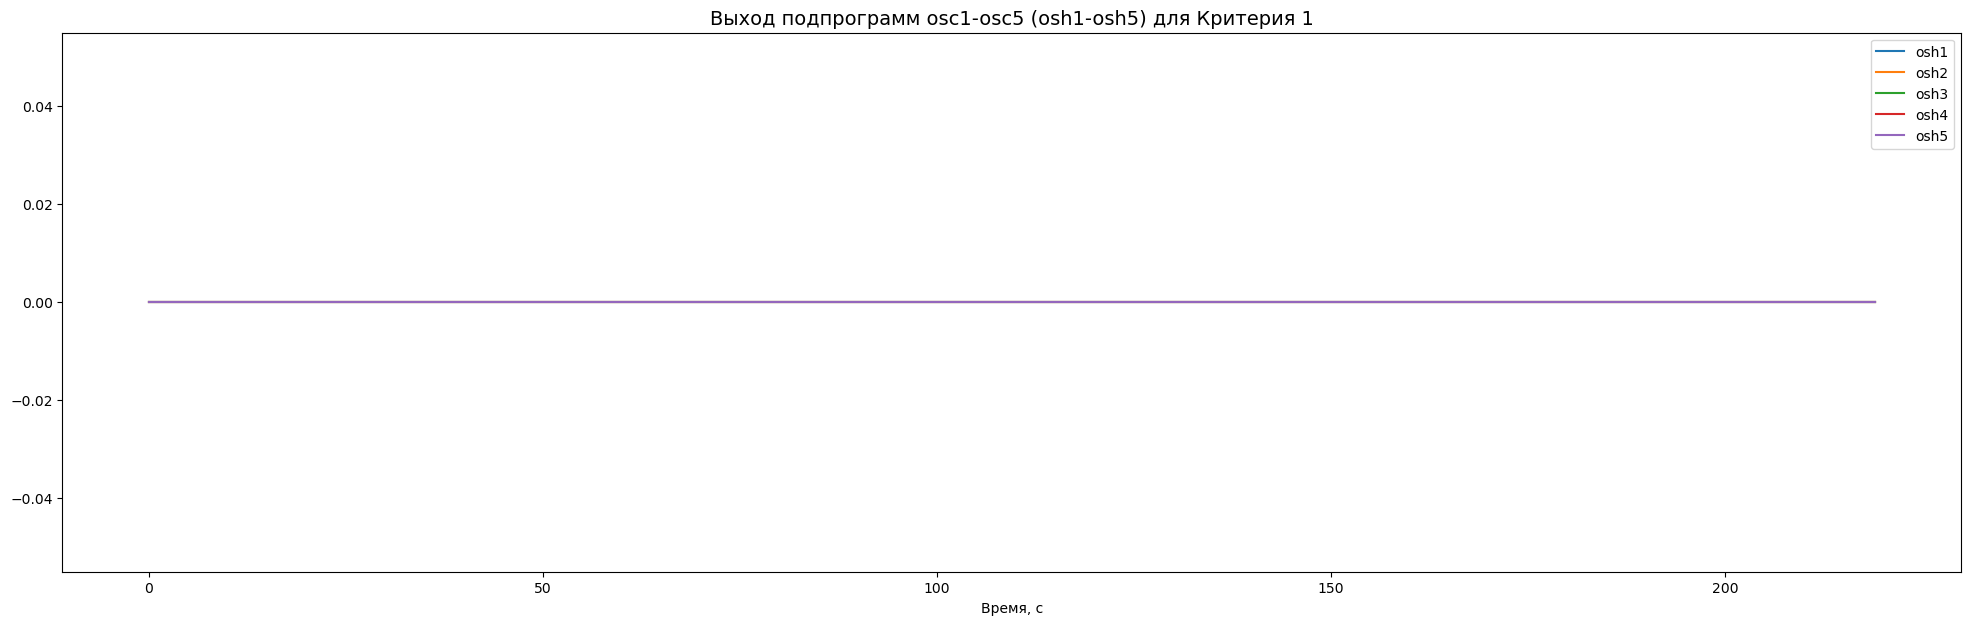

In [7]:
# Выход подпрограмм osc1-osc5 (osh1-osh5) Критерия 1
plt.title('Выход подпрограмм osc1-osc5 (osh1-osh5) для Критерия 1', fontsize=14)
plt.xlabel('Время, с')
plt.plot(df_ext_SMSR_osh["osc1"], label='osh1')
plt.plot(df_ext_SMSR_osh["osc2"], label='osh2')
plt.plot(df_ext_SMSR_osh["osc3"], label='osh3')
plt.plot(df_ext_SMSR_osh["osc4"], label='osh4')
plt.plot(df_ext_SMSR_osh["osc5"], label='osh5')
plt.legend(loc='upper right')
plt.show()

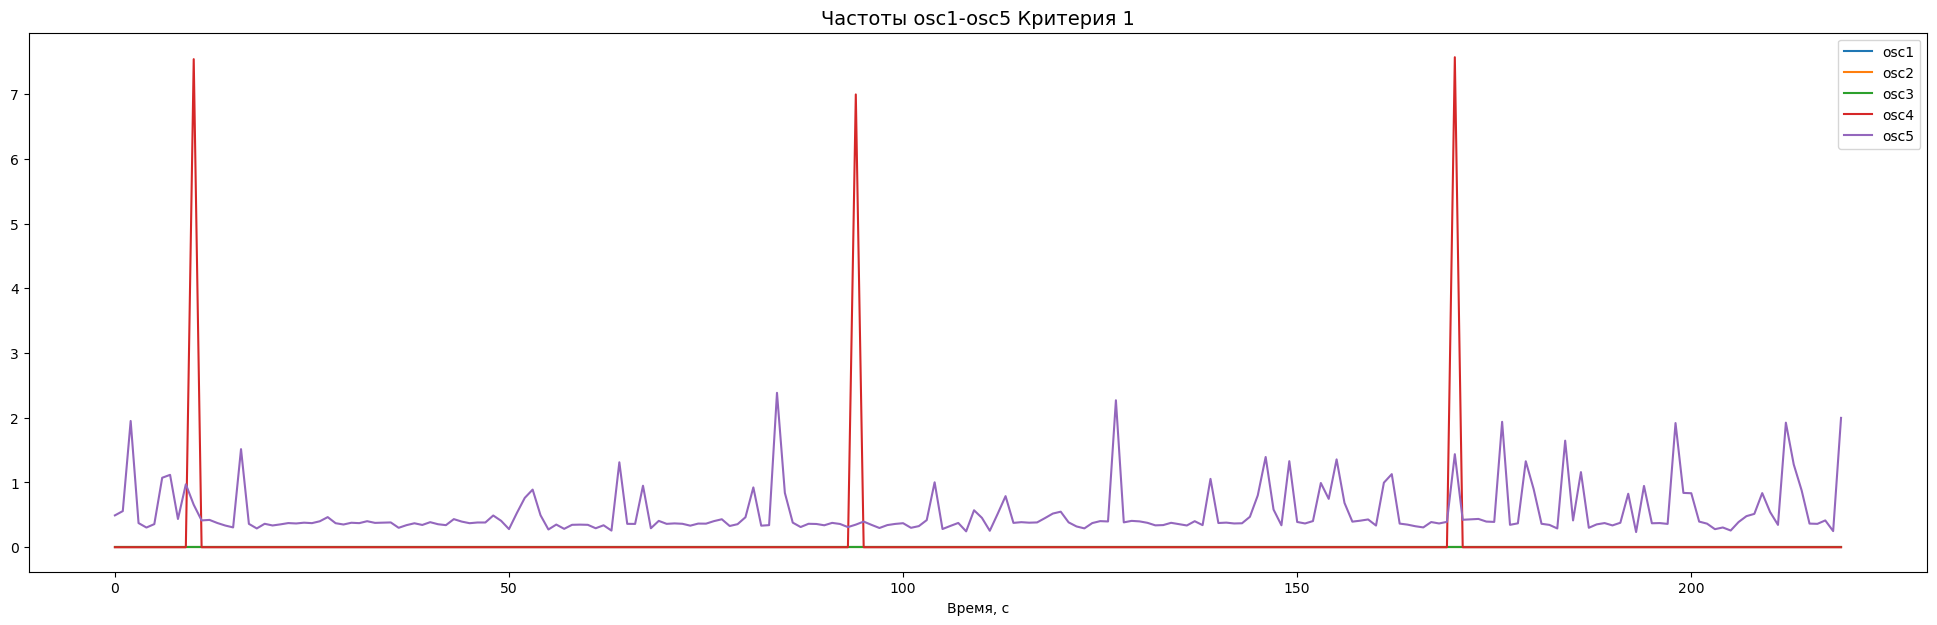

In [8]:
# Частоты osc1-osc5 Критерия 1
plt.title('Частоты osc1-osc5 Критерия 1', fontsize=14)
plt.xlabel('Время, с')
plt.plot(df_ext_SMSR_results["osc1_f"], label='osc1')
plt.plot(df_ext_SMSR_results["osc2_f"], label='osc2')
plt.plot(df_ext_SMSR_results["osc3_f"], label='osc3')
plt.plot(df_ext_SMSR_results["osc4_f"], label='osc4')
plt.plot(df_ext_SMSR_results["osc5_f"], label='osc5')
plt.legend(loc='upper right')
plt.show()

## Сравнение Поиска СК и СМСР

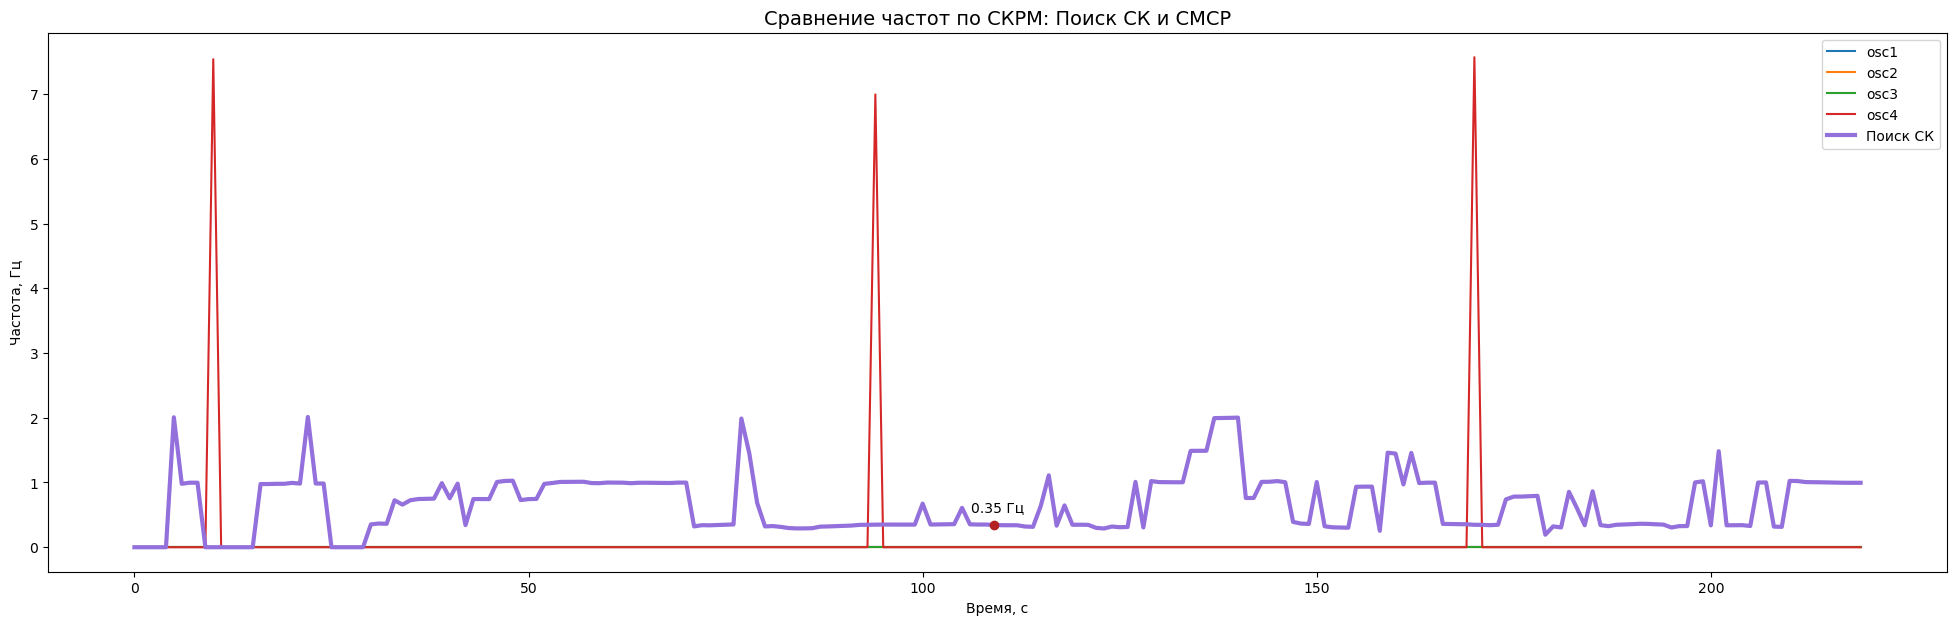

In [9]:
# Номер точки, которую вы хотите выделить
highlighted_point_index = 109  # Замените на нужный индекс

# Поиск СК и СМСР - частота (по реактивной мощности)
x=df_sk_results["time"]
y1=df_sk_results[column_prefix+"_def_P_freq"]
y1_filled = pd.Series(y1).ffill()
plt.title('Сравнение частот по СКРМ: Поиск СК и СМСР', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Частота, Гц')
plt.plot(df_ext_SMSR_results["osc1_f"], label='osc1')
plt.plot(df_ext_SMSR_results["osc2_f"], label='osc2')
plt.plot(df_ext_SMSR_results["osc3_f"], label='osc3')
plt.plot(df_ext_SMSR_results["osc4_f"], label='osc4')
plt.plot(x, y1_filled,'mediumpurple',linewidth=3, label='Поиск СК')
# Добавление выделенной точки
highlighted_x = x.iloc[highlighted_point_index]
highlighted_y = y1_filled.iloc[highlighted_point_index]
plt.scatter(highlighted_x, highlighted_y, color='firebrick', zorder=5)

# Аннотация значения выделенной точки
plt.annotate(f'{highlighted_y:.2f}'+' Гц',
             (highlighted_x, highlighted_y),
             textcoords="offset points",  # Позиционирование
             xytext=(3,10),  # Смещение метки от точки
             ha='center')  # Горизонтальное выравнивание

plt.legend(loc='upper right')
plt.show()

### Спектрограмма реактивной мощности

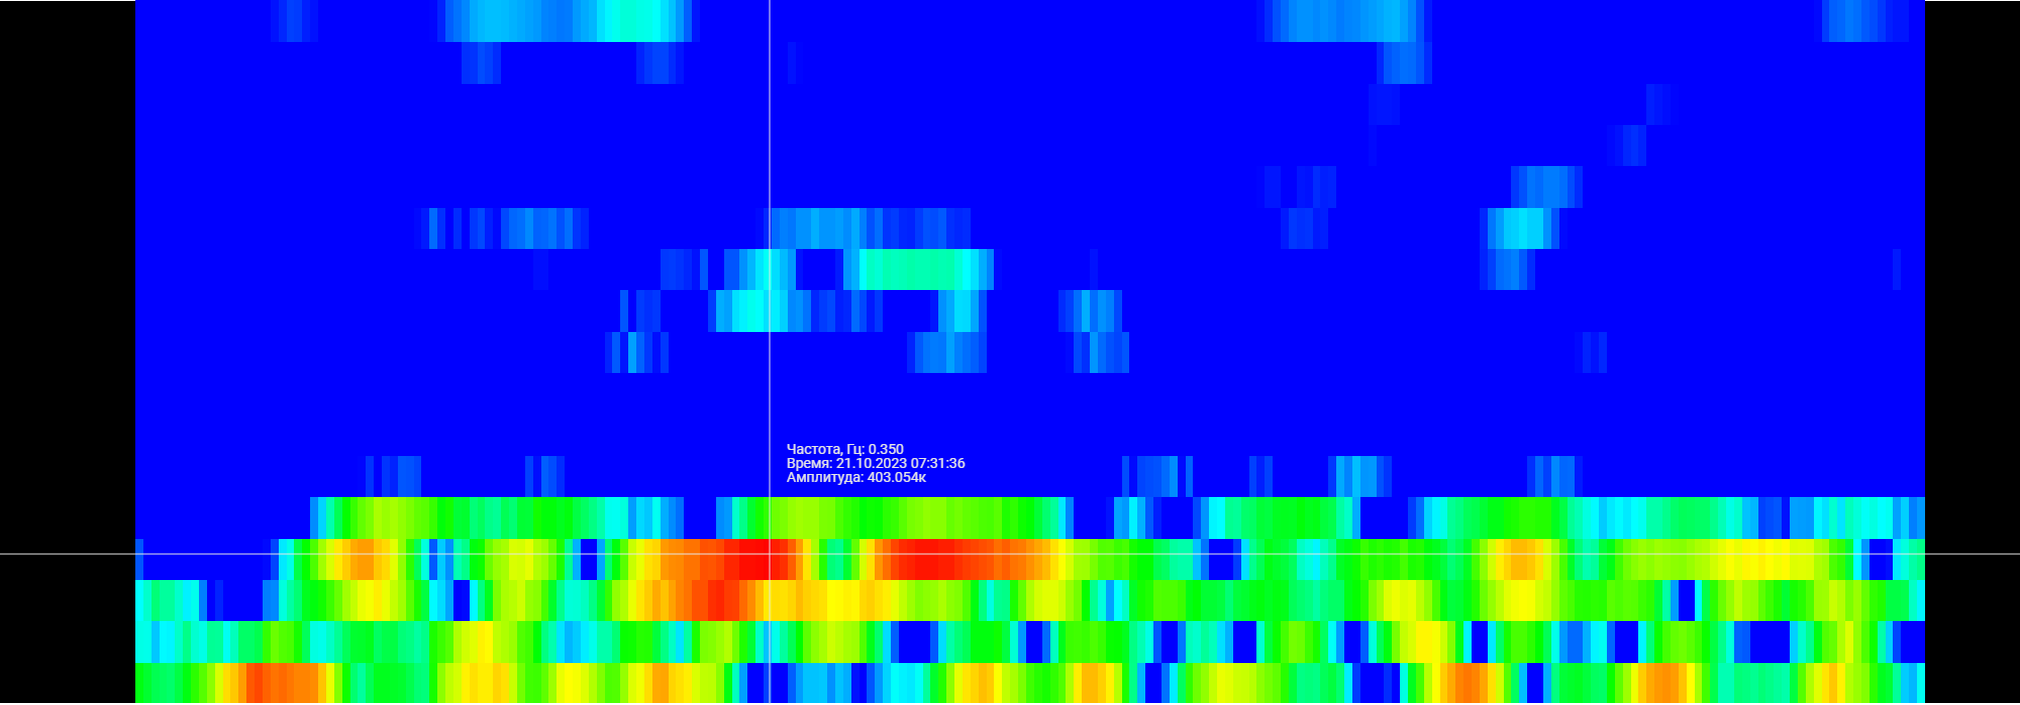

In [10]:
from PIL import Image as PILImage
from IPython.display import display
image = PILImage.open('./'+column_prefix+'/Q.png')
image_resized = image.resize((int((image.width+pic_shift) * k_scale), int(image.height * k_scale)), PILImage.Resampling.LANCZOS)  # Меняем размер изображения с использованием LANCZOS (сглаживание)
display(image_resized)

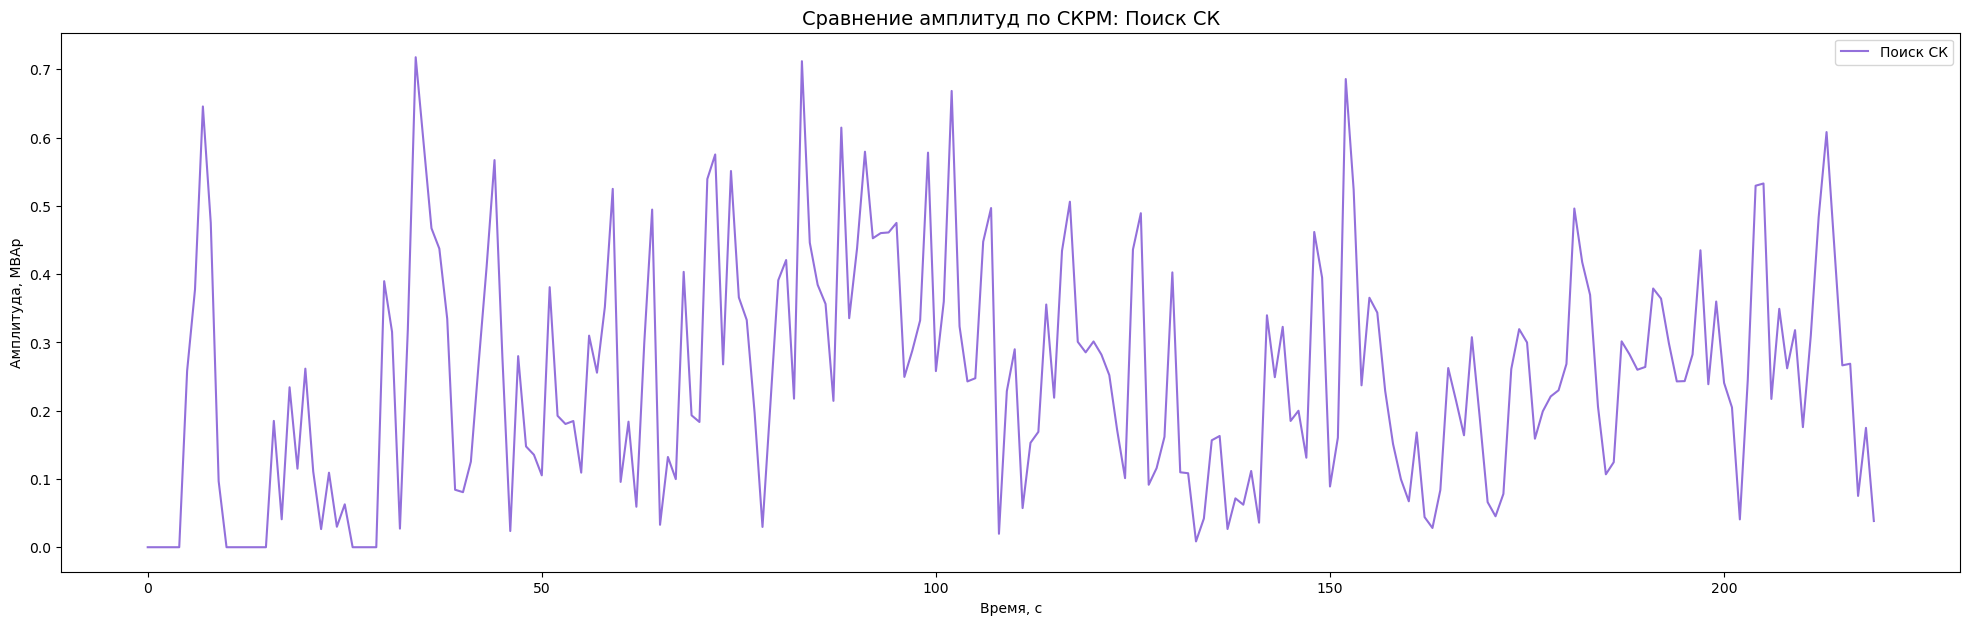

In [11]:
# Поиск СК - амплитуда (по реактивной мощности)
x = df_sk_results["time"]
y1 = df_sk_results[column_prefix+"_def_Q_amp"] / 1000000
y1_filled = pd.Series(y1).ffill()
plt.title('Сравнение амплитуд по СКРМ: Поиск СК', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, МВАр')
plt.plot(x, y1_filled, 'mediumpurple', label='Поиск СК')
plt.legend(loc='best')
plt.show()


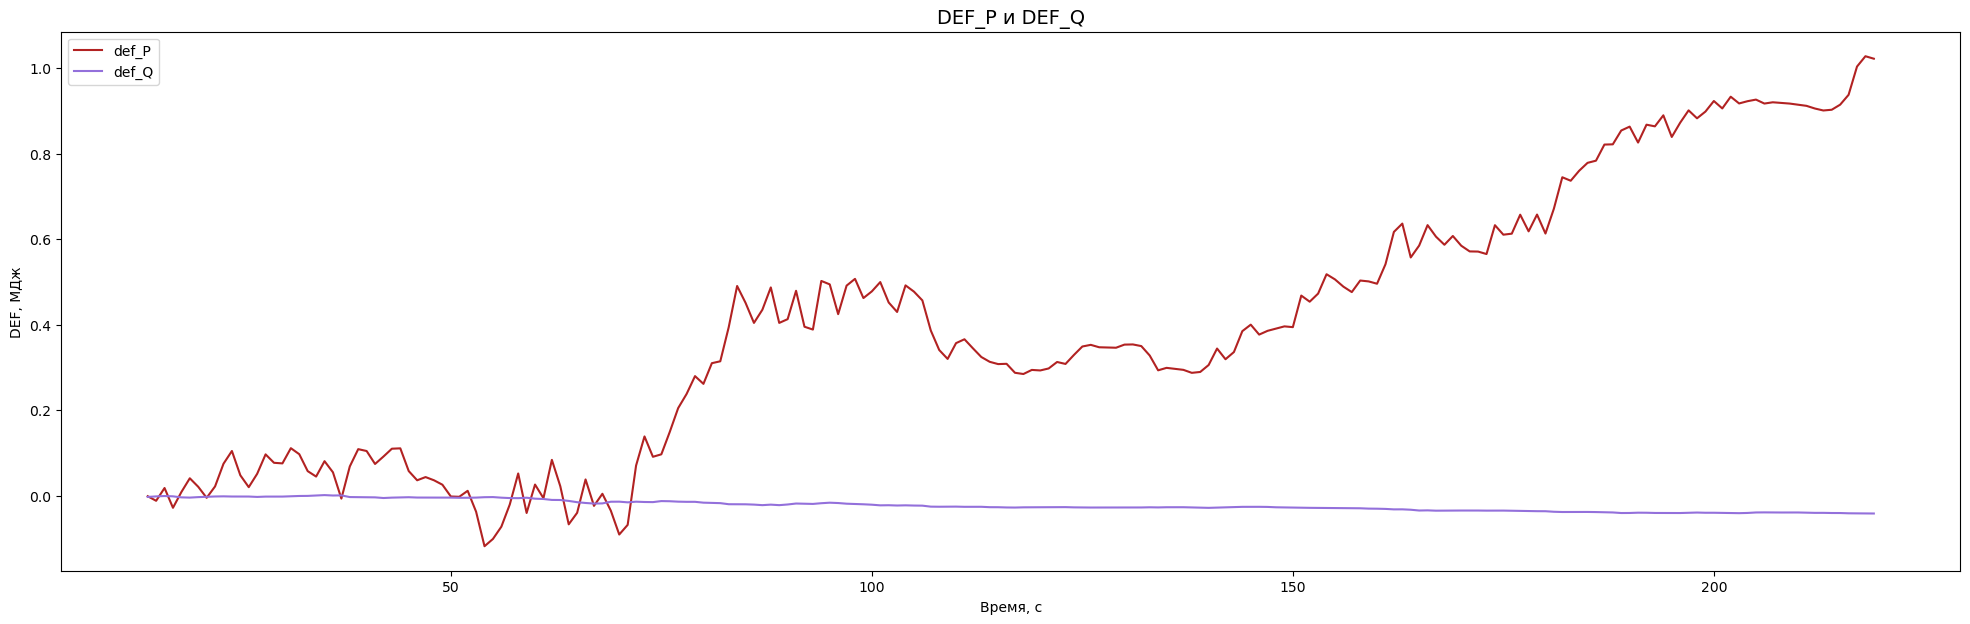

In [12]:
# DEF_P и DEF_Q
x=df_sk_results["time"]
y1=df_sk_results[column_prefix+"_def_P"]/1000000
y2=df_sk_results[column_prefix+"_def_Q"]/1000000
plt.title('DEF_P и DEF_Q', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('DEF, МДж')
plt.plot(x,y1,'firebrick',label='def_P')
plt.plot(x,y2,'mediumpurple',label='def_Q')
plt.legend(loc='best')
plt.show()

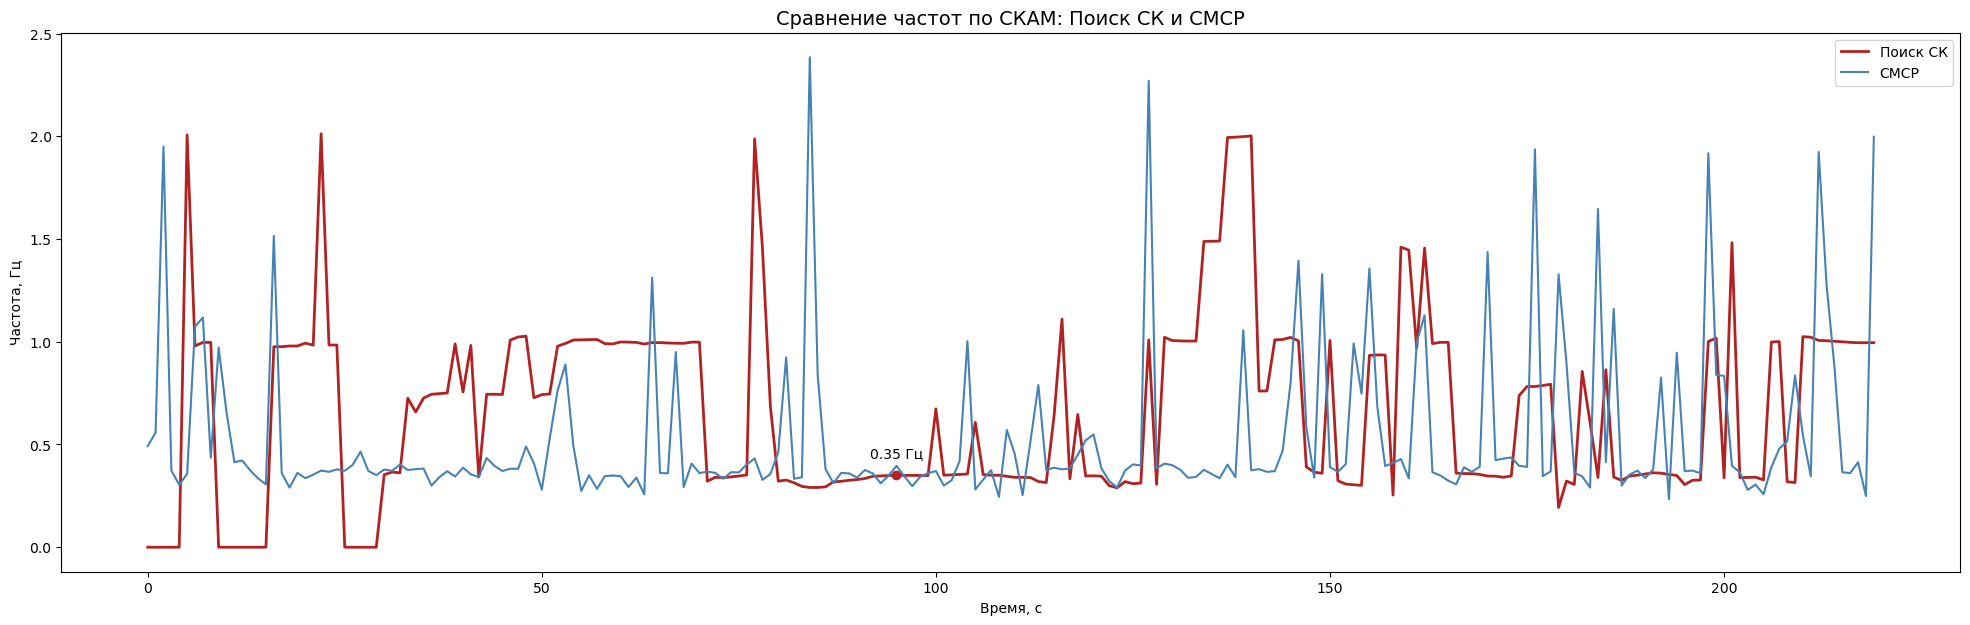

In [16]:
# Номер точки, которую вы хотите выделить
highlighted_point_index = 95  # Замените на нужный индекс

# Код для построения графика
x = df_sk_results["time"]
y1 = df_sk_results[column_prefix+"_def_P_freq"]
y1_filled = pd.Series(y1).ffill()
y2 = df_ext_SMSR_results["osc5_f"]
plt.title('Сравнение частот по СКАМ: Поиск СК и СМСР', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Частота, Гц')
plt.plot(x, y1_filled, 'firebrick', label='Поиск СК',linewidth=2)
plt.plot(y2, 'steelblue', label='СМСР')

# Добавление выделенной точки
highlighted_x = x.iloc[highlighted_point_index]
highlighted_y = y1_filled.iloc[highlighted_point_index]
plt.scatter(highlighted_x, highlighted_y, color='firebrick', zorder=5)

# Аннотация значения выделенной точки
plt.annotate(f'{highlighted_y:.2f}'+' Гц',
             (highlighted_x, highlighted_y),
             textcoords="offset points",  # Позиционирование
             xytext=(0,13),  # Смещение метки от точки
             ha='center')  # Горизонтальное выравнивание

plt.legend(loc='best')
plt.show()

### Спектрограмма активной мощности

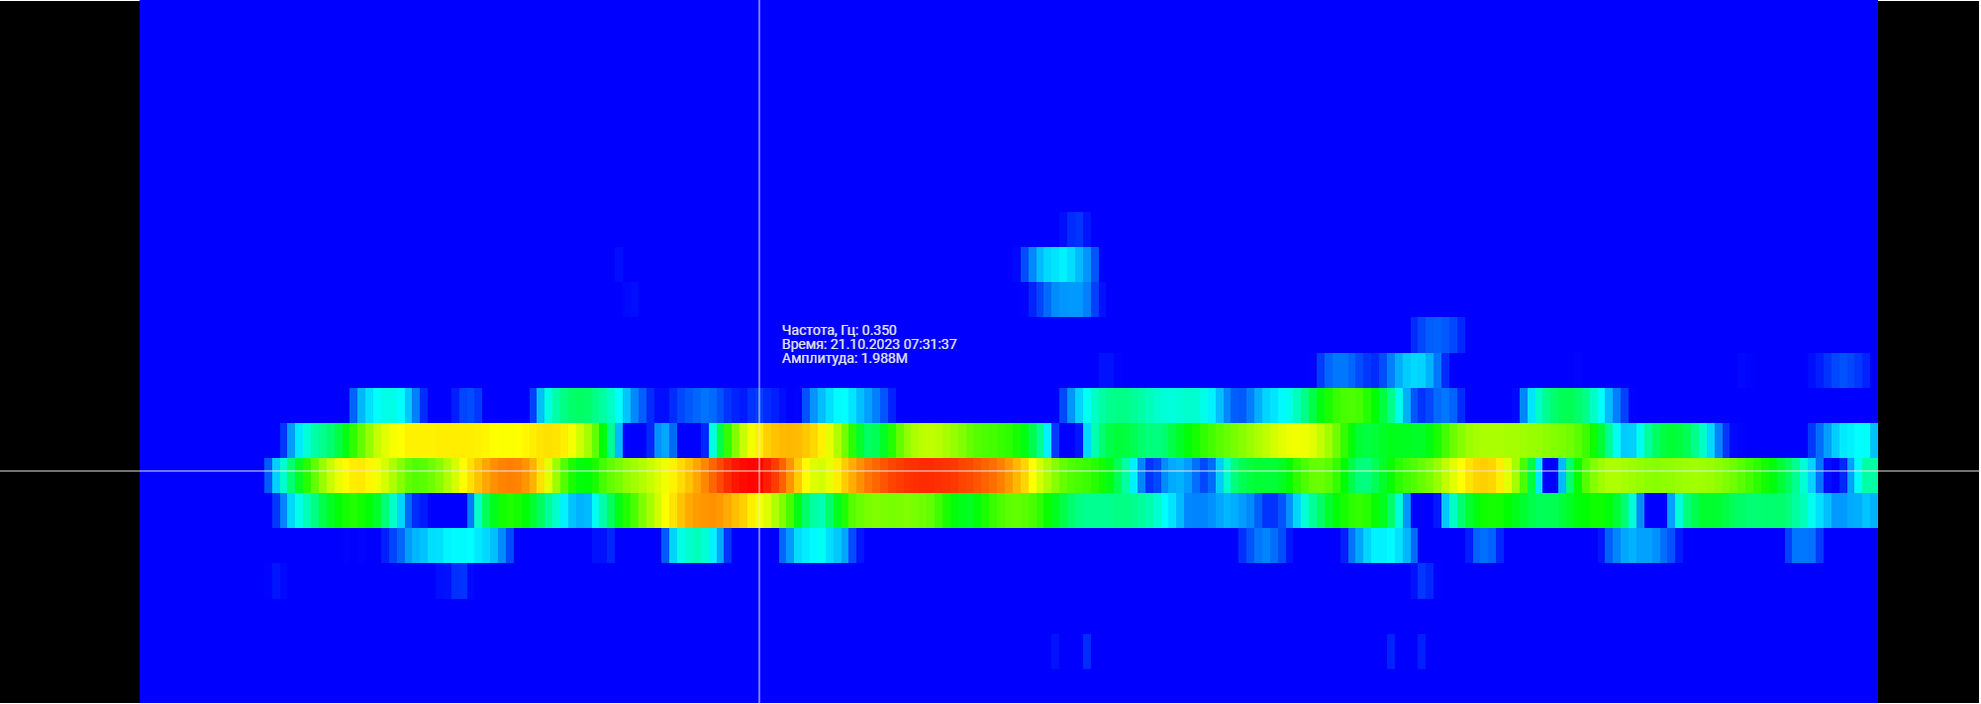

In [14]:
from PIL import Image as PILImage
from IPython.display import display
image = PILImage.open('./'+column_prefix+'/P.png')
image_resized = image.resize((int((image.width-pic_shift) * k_scale), int(image.height * k_scale)), PILImage.Resampling.LANCZOS)  # Меняем размер изображения с использованием LANCZOS (сглаживание)
display(image_resized)

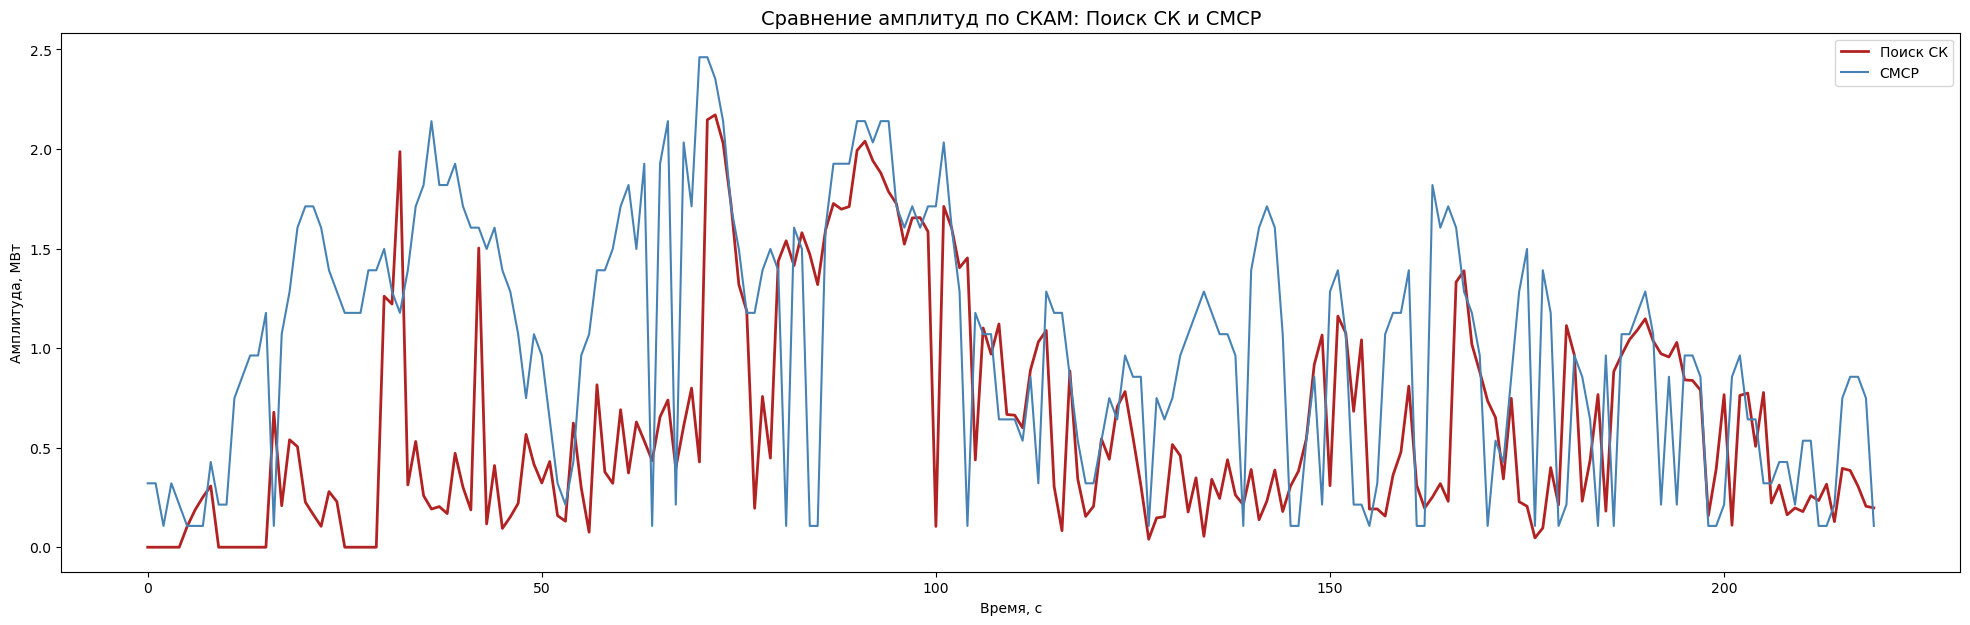

In [15]:
# Поиск СК и СМСР - амплитуда (по активной мощности)
x=df_sk_results["time"]
y1=df_sk_results[column_prefix+"_def_P_amp"]/1000000
y1_filled = pd.Series(y1).ffill()
y2=df_ext_SMSR_results["osc5_amp"]*Pnom
plt.title('Сравнение амплитуд по СКАМ: Поиск СК и СМСР', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, МВт')
plt.plot(x,y1_filled,'firebrick', label='Поиск СК',linewidth=2)
plt.plot(y2,'steelblue', label='СМСР')
plt.legend(loc='best')
plt.show()